In [1]:
import numpy as np
import os
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
pd.options.mode.chained_assignment = None  # default='warn'
plt.rcParams['font.family'] = 'Malgun Gothic'
import datetime
import math

In [2]:
%%time
main_data_df = pd.read_csv('./prepped_data/메인_데이터_20060101_20210416_ver_4.csv')
print(main_data_df.shape)
main_data_df.head()

(1480907, 18)
Wall time: 3.48 s


,지번주소,도로명주소,건물(단지)명,전용면적(㎡),거래금액(만원),층,건축년도,계약날짜기준_건물연식,계약날짜,건물연식,부동산유형,전용면적_classes,가격_면적,가격_면적_classes,X좌표,Y좌표,구,동
0,서울특별시 강남구 개포동 1264-3,서울특별시 강남구 개포로31길 23-7,(1264-3),53.28,11500,-1,1992.0,14.0,2006-08-29,29.0,연립다세대,50~55,215.840841,210~220,960076.154238,1.942459e+06,강남구,개포동
1,서울특별시 강남구 개포동 171-13,서울특별시 강남구 선릉로14길 11-0,(171-13),68.08,56500,2,1988.0,18.0,2006-12-20,33.0,연립다세대,65~70,829.905993,820~830,961145.462320,1.942843e+06,강남구,개포동
2,서울특별시 강남구 개포동 171-13,서울특별시 강남구 선릉로14길 11-0,(171-13),44.80,23300,-1,1988.0,28.0,2016-01-16,33.0,연립다세대,40~45,520.089286,520~530,961145.462320,1.942843e+06,강남구,개포동
3,서울특별시 강남구 개포동 171-13,서울특별시 강남구 선릉로14길 11-0,(171-13),44.80,24500,-1,1988.0,28.0,2016-04-09,33.0,연립다세대,40~45,546.875000,540~550,961145.462320,1.942843e+06,강남구,개포동
4,서울특별시 강남구 개포동 171-13,서울특별시 강남구 선릉로14길 11-0,(171-13),68.08,60000,2,1988.0,31.0,2019-10-23,33.0,연립다세대,65~70,881.316099,880~890,961145.462320,1.942843e+06,강남구,개포동


In [3]:
main_data_df['부동산유형'].value_counts()

아파트      821696
연립다세대    534375
오피스텔     124836
Name: 부동산유형, dtype: int64

In [4]:
main_data_df['층'] = main_data_df['층'].apply(lambda x: '지하' if x < 0 else '지상')

In [5]:
main_data_df['층'].value_counts()

지상    1430561
지하      50346
Name: 층, dtype: int64

In [6]:
main_data_df['계약날짜'] = pd.to_datetime(main_data_df['계약날짜'])

In [7]:
main_data_df['year_linear'] = (main_data_df['계약날짜'] - pd.to_datetime('2006-01-01')).dt.days / 365

In [8]:
def month_circular_sine_func(x):
    return math.sin(2*math.pi*x)

def month_circular_cosine_func(x):
    return math.cos(2*math.pi*x)

In [9]:
main_data_df['year_sin'] = main_data_df['year_linear'].apply(month_circular_sine_func)
main_data_df['year_cos'] = main_data_df['year_linear'].apply(month_circular_cosine_func)

In [10]:
main_data_df.drop(columns=['건물연식'], inplace=True)

In [11]:
main_data_df.isna().sum()

지번주소              0
도로명주소             0
건물(단지)명           0
전용면적(㎡)           0
거래금액(만원)          0
층                 0
건축년도              0
계약날짜기준_건물연식       0
계약날짜              0
부동산유형             0
전용면적_classes      0
가격_면적             0
가격_면적_classes     0
X좌표              11
Y좌표              11
구                 0
동                 0
year_linear       0
year_sin          0
year_cos          0
dtype: int64

In [12]:
main_data_df.dropna(subset=['X좌표', 'Y좌표'], inplace=True)

In [13]:
main_data_df.isna().sum()

지번주소             0
도로명주소            0
건물(단지)명          0
전용면적(㎡)          0
거래금액(만원)         0
층                0
건축년도             0
계약날짜기준_건물연식      0
계약날짜             0
부동산유형            0
전용면적_classes     0
가격_면적            0
가격_면적_classes    0
X좌표              0
Y좌표              0
구                0
동                0
year_linear      0
year_sin         0
year_cos         0
dtype: int64

In [14]:
subway_df = pd.read_csv('./지하철역/subway_coor_2.csv').sort_values(['역명']).reset_index(drop=True)
subway_df['역명'] = subway_df['역명'].apply(lambda x: x.split('_')[0])
subway_df = subway_df.drop_duplicates(subset=['x좌표', 'y좌표']).reset_index(drop=True)
print(subway_df.shape)
subway_df.head()

(673, 6)


,지번주소,도로명주소,역명,노선명,x좌표,y좌표
0,서울 강북구 삼양로 519,서울특별시 강북구 삼양로 519,419민주묘지역,우이,957082.039087,1.961221e+06
1,경기도 의정부시 평화로 633,경기도 의정부시 평화로 633,가능역,1,959847.359211,1.972179e+06
2,서울특별시 송파구 송파대로 257,서울특별시 송파구 송파대로 지하 257,가락시장역,3,966274.711075,1.943790e+06
3,서울특별시 금천구 벚꽃로 309,서울특별시 금천구 벚꽃로 309,가산 디지털단지역,1,945410.718812,1.942663e+06
4,서울특별시 강서구 양천로 485,서울특별시 강서구 양천로 지하 485,가양역,9,942981.019747,1.951551e+06


In [15]:
subway_df['역명'].unique()

array(['419민주묘지역', '가능역', '가락시장역', '가산 디지털단지역', '가양역', '가오리역', '가재울역',
       '가정역', '가정중앙시장역', '가좌역', '가천대역', '가평역', '간석역', '간석오거리역', '갈매역',
       '갈산역', '강남구청역', '강남대역', '강남역', '강동구청역', '강동역', '강매역', '강변역', '강일역',
       '강촌역', '개롱역', '개봉역', '개포동역', '개화산역', '개화역', '거여역', '건대입구역',
       '걸포북변역', '검단사거리역', '검단오류역', '검바위역', '검암역', '경기광주역', '경기도청 북부청사역',
       '경마공원역', '경복궁역', '경인교대입구역', '경전철의정부역', '경찰병원역', '계산역', '계양역',
       '고덕역', '고려대역', '고색역', '고속터미널역', '고잔역', '고진역', '고촌역', '곡산역', '곤제역',
       '곤지암역', '공덕역', '공릉역', '공항시장역', '공항화물청사역', '과천역', '관악역', '광교중앙역',
       '광나루역', '광명사거리역', '광명역', '광운대역', '광화문역', '광흥창역', '교대역', '구래역',
       '구로디지털단지역', '구로역', '구룡역', '구리역', '구반포역', '구산역', '구성역', '구의역',
       '구일역', '구파발역', '국수역', '국제업무지구역', '국회의사당역', '군자역', '군포역', '굴봉산역',
       '굴포천역', '굽은다리역', '귤현역', '금곡역', '금릉역', '금정역', '금천구청역', '금촌역', '금호역',
       '기흥역', '길동역', '길음역', '김량장역', '김유정역', '김포공항역', '까치산역', '까치울역',
       '낙성대역', '남구로역', '남동 인더스파크역', '남동구청역', '남부터미널역', '남성역', '남영역',
    

In [16]:
subway_df['노선명'].unique()

array(['우이', '1', '3', '9', '인천2', '경의중앙', '수인분당', '경춘', '인천1', '7',
       '용인경', '2', '8', '5', '김포', '공항', '경강', '의정부경', '4', '6', '신분당',
       '서해'], dtype=object)

In [17]:
subway_df['역명'] = subway_df['역명'] + '_' + subway_df['노선명']

In [18]:
subway_df['역명'].unique()

array(['419민주묘지역_우이', '가능역_1', '가락시장역_3', '가산 디지털단지역_1', '가양역_9',
       '가오리역_우이', '가재울역_인천2', '가정역_인천2', '가정중앙시장역_인천2', '가좌역_경의중앙',
       '가천대역_수인분당', '가평역_경춘', '간석역_1', '간석오거리역_인천1', '갈매역_경춘', '갈산역_인천1',
       '강남구청역_7', '강남대역_용인경', '강남역_2', '강동구청역_8', '강동역_5', '강매역_경의중앙',
       '강변역_2', '강일역_5', '강촌역_경춘', '개롱역_5', '개봉역_1', '개포동역_수인분당',
       '개화산역_5', '개화역_9', '거여역_5', '건대입구역_2', '건대입구역_7', '걸포북변역_김포',
       '검단사거리역_인천2', '검단오류역_인천2', '검바위역_인천2', '검암역_인천2', '검암역_공항',
       '경기광주역_경강', '경기도청 북부청사역_의정부경', '경마공원역_4', '경복궁역_3', '경인교대입구역_인천1',
       '경전철의정부역_의정부경', '경찰병원역_3', '계산역_인천1', '계양역_인천1', '고덕역_5', '고려대역_6',
       '고색역_수인분당', '고속터미널역_3', '고잔역_4', '고진역_용인경', '고촌역_김포', '곡산역_경의중앙',
       '곤제역_의정부경', '곤지암역_경강', '공덕역_5', '공덕역_6', '공덕역_경의중앙', '공릉역_7',
       '공항시장역_9', '공항화물청사역_공항', '과천역_4', '관악역_1', '광교중앙역_신분당', '광나루역_5',
       '광명사거리역_7', '광명역_1', '광운대역_1', '광화문역_5', '광흥창역_6', '교대역_2',
       '구래역_김포', '구로디지털단지역_2', '구로역_1', '구룡역_수인분당', '구리역_경의중앙', '구반포역_9',
       '구산역_6'

In [19]:
for i in tqdm(range(subway_df.shape[0])):
    station_name = subway_df['역명'].loc[i]
    subway_x = subway_df['x좌표'].loc[i]
    subway_y = subway_df['y좌표'].loc[i]
    
    main_data_df['{}_distance'.format(station_name)] = np.sqrt((main_data_df['X좌표'] - subway_x)**2\
    + (main_data_df['Y좌표'] - subway_y)**2)

100%|████████████████████████████████████████████████████████████████████████████████| 673/673 [00:21<00:00, 31.42it/s]


In [20]:
distance_cols = [col for col in main_data_df.columns if '_distance' in col]
print(len(distance_cols))

673


In [21]:
main_data_df['distance_nearest_station'] = main_data_df[distance_cols].min(axis=1)

In [22]:
main_data_df['nearest_station_name'] = main_data_df[distance_cols].idxmin(axis=1)

In [23]:
main_data_df['nearest_station_name'] = main_data_df['nearest_station_name'].apply(lambda x: x.replace('_distance', ''))

In [24]:
main_data_df['nearest_station_name'].unique()

array(['매봉역_3', '구룡역_수인분당', '양재시민의숲역_신분당', '논현역_7', '학동역_7', '언주역_9',
       '신논현역_9', '강남구청역_7', '선정릉역_9', '신사역_3', '선릉역_2', '한티역_수인분당',
       '삼성역_2', '대치역_3', '양재역_3', '삼성중앙역_9', '봉은사역_9', '청담역_7', '압구정역_3',
       '역삼역_2', '강남역_2', '대청역_3', '일원역_3', '압구정로데오역_수인분당', '상일동역_5',
       '고덕역_5', '길동역_5', '굽은다리역_5', '둔촌동역_5', '중앙보훈병원역_9', '명일역_5',
       '강일역_5', '천호역_5', '강동역_5', '강동구청역_8', '암사역_8', '삼양사거리역_우이',
       '미아역_4', '미아사거리역_4', '삼양역_우이', '솔샘역_우이', '수유역_4', '월계역_1',
       '가오리역_우이', '화계역_우이', '419민주묘지역_우이', '북한산우이역_우이', '솔밭공원역_우이',
       '양천향교역_9', '공항시장역_9', '송정역_5', '우장산역_5', '발산역_5', '등촌역_9', '목동역_5',
       '증미역_9', '가양역_9', '마곡나루역_9', '신방화역_9', '방화역_5', '개화산역_5', '염창역_9',
       '화곡역_5', '까치산역_2', '신정역_5', '낙성대역_2', '사당역_2', '숭실대입구역_7',
       '서울대입구역_2', '신대방삼거리역_7', '봉천역_2', '신림역_2', '신대방역_2', '구로디지털단지역_2',
       '금천구청역_1', '광나루역_5', '구의역_2', '강변역_2', '아차산역_5', '어린이대공원역_7',
       '군자역_5', '건대입구역_2', '건대입구역_7', '뚝섬유원지역_7', '중곡역_7', '용마산역_7',
       '남구로역_7', '가산 디지

In [25]:
main_data_df = main_data_df.drop(columns=distance_cols)

In [26]:
xmax = main_data_df['X좌표'].max()
xmin = main_data_df['X좌표'].min()
ymax = main_data_df['Y좌표'].max()
ymin = main_data_df['Y좌표'].min()

In [27]:
coor_minmax_df = pd.DataFrame({'xmax':xmax, 'xmin':xmin, 'ymax':ymax, 'ymin':ymin}, index=[0])
coor_minmax_df.to_csv('./Training/training_data_ver_22/coor_minmax.csv', index=False)
coor_minmax_df

,xmax,xmin,ymax,ymin
0,971728.508488,938089.149737,1.965485e+06,1.937374e+06


In [28]:
main_data_df['xnorm'] = (main_data_df['X좌표'] - xmin - ((xmax - xmin)/2))
main_data_df['ynorm'] = (main_data_df['Y좌표'] - ymin - ((ymax - ymin)/2))
main_data_df['x_2nd'] = main_data_df['xnorm']**2 / 2
main_data_df['y_2nd'] = main_data_df['ynorm']**2 / 2
main_data_df['xy'] = main_data_df['xnorm'] * main_data_df['ynorm']

In [29]:
main_data_df.drop(columns=['X좌표', 'Y좌표'], inplace=True)

In [30]:
land_specs_df = pd.read_csv('./prepped_data/land_specs_ver_20060101_20210416.csv')
land_specs_df = land_specs_df.drop(columns=['용도지역명2'])
print(land_specs_df.shape)
land_specs_df.head()

(1114560, 9)


,지번주소,년,지목명,토지면적,용도지역명1,토지이동상황,지형높이,지형형상,도로접면
0,서울특별시 강남구 개포동 1164-0,2006,대,330.4,제2종일반주거지역,상업용,평지,세로장방,세로한면(가)
1,서울특별시 강남구 개포동 1164-0,2007,대,330.4,제2종일반주거지역,상업용,평지,세로장방,세로한면(가)
2,서울특별시 강남구 개포동 1164-0,2008,대,330.4,제2종일반주거지역,상업용,평지,세로장방,세로한면(가)
3,서울특별시 강남구 개포동 1164-0,2009,대,330.4,제2종일반주거지역,상업용,평지,세로장방,세로한면(가)
4,서울특별시 강남구 개포동 1164-0,2010,대,330.4,제2종일반주거지역,상업용,평지,세로장방,세로한면(가)


In [31]:
main_data_df['년'] = main_data_df['계약날짜'].dt.year

In [32]:
main_data_df['년'].value_counts()

2006    141691
2015    134651
2016    128608
2017    118402
2020    107586
2018    101116
2007     99486
2008     92587
2014     92306
2009     91041
2019     89798
2013     75911
2011     70558
2010     61457
2012     53059
2021     22639
Name: 년, dtype: int64

In [33]:
merge_df = main_data_df.merge(land_specs_df, on=['지번주소', '년'])
print(merge_df.shape)
merge_df.head()

(1472067, 33)


,지번주소,도로명주소,건물(단지)명,전용면적(㎡),거래금액(만원),층,건축년도,계약날짜기준_건물연식,계약날짜,부동산유형,전용면적_classes,가격_면적,가격_면적_classes,구,동,year_linear,year_sin,year_cos,distance_nearest_station,nearest_station_name,xnorm,ynorm,x_2nd,y_2nd,xy,년,지목명,토지면적,용도지역명1,토지이동상황,지형높이,지형형상,도로접면
0,서울특별시 강남구 개포동 1264-3,서울특별시 강남구 개포로31길 23-7,(1264-3),53.28,11500,지하,1992.0,14.0,2006-08-29,연립다세대,50~55,215.840841,210~220,강남구,개포동,0.657534,-0.835925,-0.548843,735.633243,매봉역_3,5167.325126,-8970.432841,1.335062e+07,4.023433e+07,-4.635314e+07,2006,대,116.9,제2종일반주거지역,다세대,평지,세로장방,세로한면(가)
1,서울특별시 강남구 개포동 171-13,서울특별시 강남구 선릉로14길 11-0,(171-13),68.08,56500,지상,1988.0,18.0,2006-12-20,연립다세대,65~70,829.905993,820~830,강남구,개포동,0.967123,-0.205104,0.978740,363.965643,구룡역_수인분당,6236.633208,-8586.489321,1.944780e+07,3.686390e+07,-5.355078e+07,2006,대,181.5,제2종일반주거지역,다세대,평지,정방형,세로한면(가)
2,서울특별시 강남구 개포동 171-13,서울특별시 강남구 선릉로14길 11-0,(171-13),44.80,23300,지하,1988.0,28.0,2016-01-16,연립다세대,40~45,520.089286,520~530,강남구,개포동,10.046575,0.288482,0.957485,363.965643,구룡역_수인분당,6236.633208,-8586.489321,1.944780e+07,3.686390e+07,-5.355078e+07,2016,대,181.5,제2종일반주거지역,다세대,평지,정방형,세로한면(가)
3,서울특별시 강남구 개포동 171-13,서울특별시 강남구 선릉로14길 11-0,(171-13),44.80,24500,지하,1988.0,28.0,2016-04-09,연립다세대,40~45,546.875000,540~550,강남구,개포동,10.276712,0.985948,-0.167052,363.965643,구룡역_수인분당,6236.633208,-8586.489321,1.944780e+07,3.686390e+07,-5.355078e+07,2016,대,181.5,제2종일반주거지역,다세대,평지,정방형,세로한면(가)
4,서울특별시 강남구 개포동 171-13,서울특별시 강남구 선릉로14길 11-0,(171-13),68.08,60000,지상,1988.0,31.0,2019-10-23,연립다세대,65~70,881.316099,880~890,강남구,개포동,13.816438,-0.914128,0.405426,363.965643,구룡역_수인분당,6236.633208,-8586.489321,1.944780e+07,3.686390e+07,-5.355078e+07,2019,대,181.5,제2종일반주거지역,다세대,평지,정방형,세로한면(가)


<AxesSubplot:>

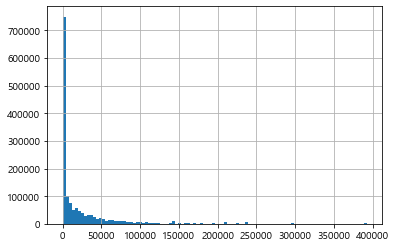

In [34]:
merge_df['토지면적'].hist(bins=100)

In [35]:
max_df = merge_df[merge_df['토지면적'] == merge_df['토지면적'].max()]
print(max_df.shape)
max_df.head()

(4338, 33)


,지번주소,도로명주소,건물(단지)명,전용면적(㎡),거래금액(만원),층,건축년도,계약날짜기준_건물연식,계약날짜,부동산유형,전용면적_classes,가격_면적,가격_면적_classes,구,동,year_linear,year_sin,year_cos,distance_nearest_station,nearest_station_name,xnorm,ynorm,x_2nd,y_2nd,xy,년,지목명,토지면적,용도지역명1,토지이동상황,지형높이,지형형상,도로접면
606890,서울특별시 송파구 가락동 479-0,서울특별시 송파구 오금로 58-0,시영2,56.17,90000,지상,1982.0,24.0,2006-01-04,아파트,55~60,1602.278797,1600~1610,송파구,가락동,0.008219,0.051620,0.998667,233.600175,잠실역_8,10233.414244,-4966.276778,5.236138e+07,1.233195e+07,-5.082197e+07,2006,대,392652.0,제3종일반주거지역,아파트,평지,사다리형,광대소각
606891,서울특별시 송파구 가락동 479-0,서울특별시 송파구 송파대로 345-0,시영2,44.60,47000,지상,1982.0,24.0,2006-01-03,아파트,40~45,1053.811659,1050~1060,송파구,가락동,0.005479,0.034422,0.999407,115.421291,송파역_8,10846.265023,-6977.302298,5.882073e+07,2.434137e+07,-7.567767e+07,2006,대,392652.0,제3종일반주거지역,아파트,평지,사다리형,광대소각
606892,서울특별시 송파구 가락동 479-0,서울특별시 송파구 송파대로 345-0,시영2,56.17,91300,지상,1982.0,24.0,2006-01-04,아파트,55~60,1625.422824,1620~1630,송파구,가락동,0.008219,0.051620,0.998667,115.421291,송파역_8,10846.265023,-6977.302298,5.882073e+07,2.434137e+07,-7.567767e+07,2006,대,392652.0,제3종일반주거지역,아파트,평지,사다리형,광대소각
606893,서울특별시 송파구 가락동 479-0,서울특별시 송파구 송파대로 345-0,시영2,51.17,69000,지상,1982.0,24.0,2006-01-04,아파트,50~55,1348.446355,1340~1350,송파구,가락동,0.008219,0.051620,0.998667,115.421291,송파역_8,10846.265023,-6977.302298,5.882073e+07,2.434137e+07,-7.567767e+07,2006,대,392652.0,제3종일반주거지역,아파트,평지,사다리형,광대소각
606894,서울특별시 송파구 가락동 479-0,서울특별시 송파구 송파대로 345-0,시영2,56.17,91300,지상,1982.0,24.0,2006-01-04,아파트,55~60,1625.422824,1620~1630,송파구,가락동,0.008219,0.051620,0.998667,115.421291,송파역_8,10846.265023,-6977.302298,5.882073e+07,2.434137e+07,-7.567767e+07,2006,대,392652.0,제3종일반주거지역,아파트,평지,사다리형,광대소각


In [36]:
merge_df['토지면적'] = merge_df['토지면적'].apply(np.log)

<AxesSubplot:>

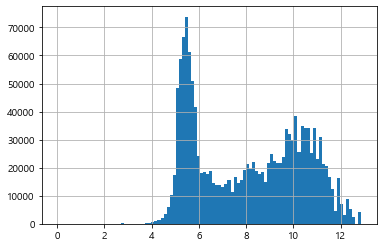

In [37]:
merge_df['토지면적'].hist(bins=100)

In [38]:
merge_df.rename(columns={'토지면적':'토지면적_log'}, inplace=True)

In [39]:
land_plans_df = pd.read_csv('./prepped_data/land_plans_ver_20060101_20210416.csv')
print(land_plans_df.shape)
land_plans_df.head()

(1116768, 355)


,지번주소,년,(한강)오염행위_제한지역,(한강)폐기물매립시설_설치제한지역,4대문안,가로구역별_최고높이_제한지역,가스공급설비,가스공급시설,가축사육제한구역,개발제한구역,개발진흥지구,개발행위허가제한지역,건축선,건축용도지역기타,건축용도지역미분류,건축허가_착공제한지역,경관광장,경관녹지,경관지구,경관지구기타,고가도로,고도지구,고등학교,고속철도,고압선,공간시설미분류,공공공지,공공도서관,공공문화체육시설미분류,공공시설구역,공공시설용지,공공주택지구,공공지원민간임대주택_공급촉진지구,공공청사,공동구,공설화장시설,공용시설보호지구,공원,공원마을지구(공원집단시설지구),공원문화유산지구,공원자연보존지구,공원자연환경지구,공익용산지,공익임지,공장설립승인지역,공장설립제한지역,공항,공항소음피해예상지역,공항소음피해지역,공항시설보호지구,과밀억제권역,광로1류(폭_70M_이상),광로2류(폭_50M_70M),광로3류(폭_40M_50M),광역계획구역,광역복합환승센터,광장,교육환경보호구역,교차점광장,교통광장,교통운수시설미분류,국가산업단지,국가지정문화재구역,국가하천,국립공원,국민임대주택단지예정지구,국지도로,국토이용기타용도지구,국토이용용도지구기타,군사기지_및_군사시설_보호구역,군사시설_보호구역,궤도,근린공원,근린광장,근린상업지역,기업형임대주택_공급촉진지구,기타공공공지시설,기타공공청사시설,기타공원시설,기타교통시설,기타녹지시설,기타도로시설,기타도시공간시설,기타도시방재시설,기타문화시설,기타방송통신시설,기타보건위생시설,기타사회복지시설,기타수도시설,기타시장시설,기타열공급설비,기타용도지역지구기타,기타용도지역지구미분류,기타용지,기타유통및공급시설,기타유통업무설비,기타자동차정류장,기타전기공급설비,기타주차장시설,기타철도시설,기타폐기물처리시설,기타하수도시설,기타학교시설,기타환경기초시설,노외주차장,녹지,농수산물공판장및농수산물종합유통센터,대공방어협조구역,대공방어협조구역(위탁고도_54_236m),대공방어협조구역(위탁고도_77_257m),대로1류(폭_35M_40M),대로2류(폭_30M_35M),대로3류(폭_25M_30M),대학,도로,도로구역,도서관,도시개발구역,도시개발구역기타,도시고속도로,도시관리계획_입안중,도시기타용도지역지구기타,도시기타용도지역지구미분류,도시기타용도지역지구용도지역지구,도시자연공원,도시자연공원구역,도시지역,도시지역기타,도시철도,등록문화재구역,리모델링지구,묘지공원,문화공원,문화시설,문화재,문화재보존영향_검토대상구역,문화재보호구역,문화재보호구역기타,문화지구,미관지구,미관지구기타,박물관,방송통신시설,방수설비,방재지구,방화지구,배수시설,변전소(전원개발사업구역),변전시설,보건위생시설미분류,보전녹지지역,보전산지,보전임지,보조간선도로,보존지구,보행자전용도로,부설주차장,비오톱1등급,비행안전제1구역(전술),비행안전제2구역(전술),비행안전제2구역(지원),비행안전제3구역(전술),비행안전제3구역(지원),비행안전제4구역(전술),비행안전제4구역(지원),비행안전제5구역(전술),비행안전제5구역(지원),비행안전제6구역(전술),사고지,사방시설,사방지,사업지역기타,사업지역미분류,사회복지시설,산업개발진흥지구,산업기술단지,산업시설구역,상대보호구역,상대정화구역,상수원보호구역,상수원보호기타,생산녹지지역,생태_경관보전지역,생태_경관완충보전구역,생태_경관핵심보전구역,소공원,소로1류(폭_10M_12M),소로2류(폭_8M_10M),소로3류(폭_8M_미만),소하천,소하천구역,소하천예정지,수도공급시설,수변공원,수질오염방지시설,수평표면구역,시_도_생태_경관보전지역,시_도야생생물보호구역,시가지경관지구,시가지조성사업지역,시도지정문화재구역,시장,시장정비구역,시장정비구역기타,시험림구역,아파트지구,액화석유가스충전시설,야생생물보호구역,어린이공원,여객자동차터미널,역사도심,역사문화미관지구,역사문화특화경관지구,역사문화환경보존지역,연결녹지,연구개발특구,연구시설,열공급설비,온천공보호구역,온천원보호지구,완충녹지,용도구역기타,용도구역미분류,용도지구취락지구,운동장,원추표면구역,원형보존지,유류저장및송유설비,유수시설,유수지,유원지,유치원,유통단지,유통상업지역,유통업무설비,일단의공업용지조성사업지역,일단의주택단지조성사업지역,일반광장,일반도로,일반미관지구,일반산업단지,일반상업지역,일반주거지역,일반철도,임업용산지,자동차검사시설,자동차운전학원,자동차전용도로,자동차정류장,자연경관지구,자연공원용도지구기타,자연녹지지역,자연재해위험지구,장애물제한표면구역,재개발구역,재개발구역기타,재정비촉진지구,재정비촉진지구기타,재해위험지구기타,재활용시설,저류시설,전기공급설비,전용주거지역,전이표면구역,전통사찰보존구역,절대보호구역,절대정화구역,정비구역,정비구역기타,정비예정구역,제1종일반주거지역,제1종전용주거지역,제1종지구단위계획구역,제2종일반주거지역,제2종전용주거지역,제3종_구역,제3종일반주거지역,제방,제한보호구역,제한보호구역(방공기지___1km),제한보호구역(전술항공_5km),제한보호구역(후방지역_500m),조례로정한지역,조망가로미관지구,조망가로특화경관지구,종합운동장,종합의료시설,주간선도로,주거용지,주거환경개선지구,주요시설광장,주차장,주차장기타,주차환경개선지구,준공업지역,준보전산지,준주거지역,중로1류(폭_20M_25M),중로2류(폭_15M_20M),중로3류(폭_12M_15M),중심대광장,중심상업지역,중심지미관지구,중요시설물보존지구,중요시설물보호지구,중요시설물보호지구(공용),중요시설물보호지구(공항),중점경관관리구역,중학교,지구단위계획구역,지역특화발전특구,지원시설구역,지정문화재구역,지하광장,지하도로,진입표면구역,집단취락지구,집산도로,철도,철도보호지구,청사,청소년수련시설,체육공원,체육시설,초등학교,최고고도지구,취수시설,침수위험지구,택지개발예정지구,택지개발예정지구기타,토지거래계약에관한허가구역,토지구획정리사업지구기타,토지형질변경규제지역,통제보호구역,통제보호구역(민통선이남_300m),통제보호구역(방공기지_500m),특수도로(보행자전용도로),특정개발진흥지구,특정용도제한지구,특화경관지구,폐기물처리및재활용시설,폐기물처리시설,하수도,하수종말처리시설,하천,하천구역,하천미분류,학교,학교시설보호지구,학교이적지,학교환경위생_정화구역,현상변경허가_대상구역,홍수관리구역,화장장,환경정비구역
0,서울특별시 강남구 개포동 1164-0,2006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [40]:
for col in tqdm(land_plans_df.columns):
    if col not in ['지번주소', '년']:
        land_plans_df[col] = land_plans_df[col].astype('Int64')

100%|████████████████████████████████████████████████████████████████████████████████| 355/355 [01:44<00:00,  3.38it/s]


In [41]:
land_plans_df.head()

,지번주소,년,(한강)오염행위_제한지역,(한강)폐기물매립시설_설치제한지역,4대문안,가로구역별_최고높이_제한지역,가스공급설비,가스공급시설,가축사육제한구역,개발제한구역,개발진흥지구,개발행위허가제한지역,건축선,건축용도지역기타,건축용도지역미분류,건축허가_착공제한지역,경관광장,경관녹지,경관지구,경관지구기타,고가도로,고도지구,고등학교,고속철도,고압선,공간시설미분류,공공공지,공공도서관,공공문화체육시설미분류,공공시설구역,공공시설용지,공공주택지구,공공지원민간임대주택_공급촉진지구,공공청사,공동구,공설화장시설,공용시설보호지구,공원,공원마을지구(공원집단시설지구),공원문화유산지구,공원자연보존지구,공원자연환경지구,공익용산지,공익임지,공장설립승인지역,공장설립제한지역,공항,공항소음피해예상지역,공항소음피해지역,공항시설보호지구,과밀억제권역,광로1류(폭_70M_이상),광로2류(폭_50M_70M),광로3류(폭_40M_50M),광역계획구역,광역복합환승센터,광장,교육환경보호구역,교차점광장,교통광장,교통운수시설미분류,국가산업단지,국가지정문화재구역,국가하천,국립공원,국민임대주택단지예정지구,국지도로,국토이용기타용도지구,국토이용용도지구기타,군사기지_및_군사시설_보호구역,군사시설_보호구역,궤도,근린공원,근린광장,근린상업지역,기업형임대주택_공급촉진지구,기타공공공지시설,기타공공청사시설,기타공원시설,기타교통시설,기타녹지시설,기타도로시설,기타도시공간시설,기타도시방재시설,기타문화시설,기타방송통신시설,기타보건위생시설,기타사회복지시설,기타수도시설,기타시장시설,기타열공급설비,기타용도지역지구기타,기타용도지역지구미분류,기타용지,기타유통및공급시설,기타유통업무설비,기타자동차정류장,기타전기공급설비,기타주차장시설,기타철도시설,기타폐기물처리시설,기타하수도시설,기타학교시설,기타환경기초시설,노외주차장,녹지,농수산물공판장및농수산물종합유통센터,대공방어협조구역,대공방어협조구역(위탁고도_54_236m),대공방어협조구역(위탁고도_77_257m),대로1류(폭_35M_40M),대로2류(폭_30M_35M),대로3류(폭_25M_30M),대학,도로,도로구역,도서관,도시개발구역,도시개발구역기타,도시고속도로,도시관리계획_입안중,도시기타용도지역지구기타,도시기타용도지역지구미분류,도시기타용도지역지구용도지역지구,도시자연공원,도시자연공원구역,도시지역,도시지역기타,도시철도,등록문화재구역,리모델링지구,묘지공원,문화공원,문화시설,문화재,문화재보존영향_검토대상구역,문화재보호구역,문화재보호구역기타,문화지구,미관지구,미관지구기타,박물관,방송통신시설,방수설비,방재지구,방화지구,배수시설,변전소(전원개발사업구역),변전시설,보건위생시설미분류,보전녹지지역,보전산지,보전임지,보조간선도로,보존지구,보행자전용도로,부설주차장,비오톱1등급,비행안전제1구역(전술),비행안전제2구역(전술),비행안전제2구역(지원),비행안전제3구역(전술),비행안전제3구역(지원),비행안전제4구역(전술),비행안전제4구역(지원),비행안전제5구역(전술),비행안전제5구역(지원),비행안전제6구역(전술),사고지,사방시설,사방지,사업지역기타,사업지역미분류,사회복지시설,산업개발진흥지구,산업기술단지,산업시설구역,상대보호구역,상대정화구역,상수원보호구역,상수원보호기타,생산녹지지역,생태_경관보전지역,생태_경관완충보전구역,생태_경관핵심보전구역,소공원,소로1류(폭_10M_12M),소로2류(폭_8M_10M),소로3류(폭_8M_미만),소하천,소하천구역,소하천예정지,수도공급시설,수변공원,수질오염방지시설,수평표면구역,시_도_생태_경관보전지역,시_도야생생물보호구역,시가지경관지구,시가지조성사업지역,시도지정문화재구역,시장,시장정비구역,시장정비구역기타,시험림구역,아파트지구,액화석유가스충전시설,야생생물보호구역,어린이공원,여객자동차터미널,역사도심,역사문화미관지구,역사문화특화경관지구,역사문화환경보존지역,연결녹지,연구개발특구,연구시설,열공급설비,온천공보호구역,온천원보호지구,완충녹지,용도구역기타,용도구역미분류,용도지구취락지구,운동장,원추표면구역,원형보존지,유류저장및송유설비,유수시설,유수지,유원지,유치원,유통단지,유통상업지역,유통업무설비,일단의공업용지조성사업지역,일단의주택단지조성사업지역,일반광장,일반도로,일반미관지구,일반산업단지,일반상업지역,일반주거지역,일반철도,임업용산지,자동차검사시설,자동차운전학원,자동차전용도로,자동차정류장,자연경관지구,자연공원용도지구기타,자연녹지지역,자연재해위험지구,장애물제한표면구역,재개발구역,재개발구역기타,재정비촉진지구,재정비촉진지구기타,재해위험지구기타,재활용시설,저류시설,전기공급설비,전용주거지역,전이표면구역,전통사찰보존구역,절대보호구역,절대정화구역,정비구역,정비구역기타,정비예정구역,제1종일반주거지역,제1종전용주거지역,제1종지구단위계획구역,제2종일반주거지역,제2종전용주거지역,제3종_구역,제3종일반주거지역,제방,제한보호구역,제한보호구역(방공기지___1km),제한보호구역(전술항공_5km),제한보호구역(후방지역_500m),조례로정한지역,조망가로미관지구,조망가로특화경관지구,종합운동장,종합의료시설,주간선도로,주거용지,주거환경개선지구,주요시설광장,주차장,주차장기타,주차환경개선지구,준공업지역,준보전산지,준주거지역,중로1류(폭_20M_25M),중로2류(폭_15M_20M),중로3류(폭_12M_15M),중심대광장,중심상업지역,중심지미관지구,중요시설물보존지구,중요시설물보호지구,중요시설물보호지구(공용),중요시설물보호지구(공항),중점경관관리구역,중학교,지구단위계획구역,지역특화발전특구,지원시설구역,지정문화재구역,지하광장,지하도로,진입표면구역,집단취락지구,집산도로,철도,철도보호지구,청사,청소년수련시설,체육공원,체육시설,초등학교,최고고도지구,취수시설,침수위험지구,택지개발예정지구,택지개발예정지구기타,토지거래계약에관한허가구역,토지구획정리사업지구기타,토지형질변경규제지역,통제보호구역,통제보호구역(민통선이남_300m),통제보호구역(방공기지_500m),특수도로(보행자전용도로),특정개발진흥지구,특정용도제한지구,특화경관지구,폐기물처리및재활용시설,폐기물처리시설,하수도,하수종말처리시설,하천,하천구역,하천미분류,학교,학교시설보호지구,학교이적지,학교환경위생_정화구역,현상변경허가_대상구역,홍수관리구역,화장장,환경정비구역
0,서울특별시 강남구 개포동 1164-0,2006,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,서울특별시 강남구 개포동 1164-0,2007,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [42]:
merge_df2 = merge_df.merge(land_plans_df, on=['지번주소', '년'])
print(merge_df2.shape)
merge_df2.head()

(1471947, 386)


,지번주소,도로명주소,건물(단지)명,전용면적(㎡),거래금액(만원),층,건축년도,계약날짜기준_건물연식,계약날짜,부동산유형,전용면적_classes,가격_면적,가격_면적_classes,구,동,year_linear,year_sin,year_cos,distance_nearest_station,nearest_station_name,xnorm,ynorm,x_2nd,y_2nd,xy,년,지목명,토지면적_log,용도지역명1,토지이동상황,지형높이,지형형상,도로접면,(한강)오염행위_제한지역,(한강)폐기물매립시설_설치제한지역,4대문안,가로구역별_최고높이_제한지역,가스공급설비,가스공급시설,가축사육제한구역,개발제한구역,개발진흥지구,개발행위허가제한지역,건축선,건축용도지역기타,건축용도지역미분류,건축허가_착공제한지역,경관광장,경관녹지,경관지구,경관지구기타,고가도로,고도지구,고등학교,고속철도,고압선,공간시설미분류,공공공지,공공도서관,공공문화체육시설미분류,공공시설구역,공공시설용지,공공주택지구,공공지원민간임대주택_공급촉진지구,공공청사,공동구,공설화장시설,공용시설보호지구,공원,공원마을지구(공원집단시설지구),공원문화유산지구,공원자연보존지구,공원자연환경지구,공익용산지,공익임지,공장설립승인지역,공장설립제한지역,공항,공항소음피해예상지역,공항소음피해지역,공항시설보호지구,과밀억제권역,광로1류(폭_70M_이상),광로2류(폭_50M_70M),광로3류(폭_40M_50M),광역계획구역,광역복합환승센터,광장,교육환경보호구역,교차점광장,교통광장,교통운수시설미분류,국가산업단지,국가지정문화재구역,국가하천,국립공원,국민임대주택단지예정지구,국지도로,국토이용기타용도지구,국토이용용도지구기타,군사기지_및_군사시설_보호구역,군사시설_보호구역,궤도,근린공원,근린광장,근린상업지역,기업형임대주택_공급촉진지구,기타공공공지시설,기타공공청사시설,기타공원시설,기타교통시설,기타녹지시설,기타도로시설,기타도시공간시설,기타도시방재시설,기타문화시설,기타방송통신시설,기타보건위생시설,기타사회복지시설,기타수도시설,기타시장시설,기타열공급설비,기타용도지역지구기타,기타용도지역지구미분류,기타용지,기타유통및공급시설,기타유통업무설비,기타자동차정류장,기타전기공급설비,기타주차장시설,기타철도시설,기타폐기물처리시설,기타하수도시설,기타학교시설,기타환경기초시설,노외주차장,녹지,농수산물공판장및농수산물종합유통센터,대공방어협조구역,대공방어협조구역(위탁고도_54_236m),대공방어협조구역(위탁고도_77_257m),대로1류(폭_35M_40M),대로2류(폭_30M_35M),대로3류(폭_25M_30M),대학,도로,도로구역,도서관,도시개발구역,도시개발구역기타,도시고속도로,도시관리계획_입안중,도시기타용도지역지구기타,도시기타용도지역지구미분류,도시기타용도지역지구용도지역지구,도시자연공원,도시자연공원구역,도시지역,도시지역기타,도시철도,등록문화재구역,리모델링지구,묘지공원,문화공원,문화시설,문화재,문화재보존영향_검토대상구역,문화재보호구역,문화재보호구역기타,문화지구,미관지구,미관지구기타,박물관,방송통신시설,방수설비,방재지구,방화지구,배수시설,변전소(전원개발사업구역),변전시설,보건위생시설미분류,보전녹지지역,보전산지,보전임지,보조간선도로,보존지구,보행자전용도로,부설주차장,비오톱1등급,비행안전제1구역(전술),비행안전제2구역(전술),비행안전제2구역(지원),비행안전제3구역(전술),비행안전제3구역(지원),비행안전제4구역(전술),비행안전제4구역(지원),비행안전제5구역(전술),비행안전제5구역(지원),비행안전제6구역(전술),사고지,사방시설,사방지,사업지역기타,사업지역미분류,사회복지시설,산업개발진흥지구,산업기술단지,산업시설구역,상대보호구역,상대정화구역,상수원보호구역,상수원보호기타,생산녹지지역,생태_경관보전지역,생태_경관완충보전구역,생태_경관핵심보전구역,소공원,소로1류(폭_10M_12M),소로2류(폭_8M_10M),소로3류(폭_8M_미만),소하천,소하천구역,소하천예정지,수도공급시설,수변공원,수질오염방지시설,수평표면구역,시_도_생태_경관보전지역,시_도야생생물보호구역,시가지경관지구,시가지조성사업지역,시도지정문화재구역,시장,시장정비구역,시장정비구역기타,시험림구역,아파트지구,액화석유가스충전시설,야생생물보호구역,어린이공원,여객자동차터미널,역사도심,역사문화미관지구,역사문화특화경관지구,역사문화환경보존지역,연결녹지,연구개발특구,연구시설,열공급설비,온천공보호구역,온천원보호지구,완충녹지,용도구역기타,용도구역미분류,용도지구취락지구,운동장,원추표면구역,원형보존지,유류저장및송유설비,유수시설,유수지,유원지,유치원,유통단지,유통상업지역,유통업무설비,일단의공업용지조성사업지역,일단의주택단지조성사업지역,일반광장,일반도로,일반미관지구,일반산업단지,일반상업지역,일반주거지역,일반철도,임업용산지,자동차검사시설,자동차운전학원,자동차전용도로,자동차정류장,자연경관지구,자연공원용도지구기타,자연녹지지역,자연재해위험지구,장애물제한표면구역,재개발구역,재개발구역기타,재정비촉진지구,재정비촉진지구기타,재해위험지구기타,재활용시설,저류시설,전기공급설비,전용주거지역,전이표면구역,전통사찰보존구역,절대보호구역,절대정화구역,정비구역,정비구역기타,정비예정구역,제1종일반주거지역,제1종전용주거지역,제1종지구단위계획구역,제2종일반주거지역,제2종전용주거지역,제3종_구역,제3종일반주거지역,제방,제한보호구역,제한보호구역(방공기지___1km),제한보호구역(전술항공_5km),제한보호구역(후방지역_500m),조례로정한지역,조망가로미관지구,조망가로특화경관지구,종합운동장,종합의료시설,주간선도로,주거용지,주거환경개선지구,주요시설광장,주차장,주차장기타,주차환경개선지구,준공업지역,준보전산지,준주거지역,중로1류(폭_20M_25M),중로2류(폭_15M_20M),중로3류(폭_12M_15M),중심대광장,중심상업지역,중심지미관지구,중요시설물보존지구,중요시설물보호지구,중요시설물보호지구(공용),중요시설물보호지구(공항),중점경관관리구역,중학교,지구단위계획구역,지역특화발전특구,지원시설구역,지정문화재구역,지하광장,지하도로,진입표면구역,집단취락지구,집산도로,철도,철도보호지구,청사,청소년수련시설,체육공원,체육시설,초등학교,최고고도지구,취수시설,침수위험지구,택지개발예정지구,택지개발예정지구기타,토지거래계약에관한허가구역,토지구획정리사업지구기타,토지형질변경규제지역,통제보호구역,통제보호구역(민통선이남_300m),통제보호구역(방공기지_500m),특수도로(보행자전용도로),특정개발진흥지구,특정용도제한지구,특화경관지구,폐기물처리및재활용시설,폐기물처리시설,하수도,하수종말처리시설,하천,하천구역,하천미분류,학교,학교시설보호지구,학교이적지,학교환경위생_정화구역,현상변경허가_대상구역,홍수관리구역,화장장,환경정비구역
0,서울특별시 강남구 개포동 1264-3,서울특별시 강남구 개포로31길 23-7,(1264-3),53.28,11500,지하,1992.0,14.0,2006-08-29,연립다세대,50~55,215.840841,210~220,강남구,개포동,0.657534,-0.835925,-0.548843,735.633243,매봉역_3,5167.325126,-8970.432841,1.335062e+07,4.023433e+07,-4.635314e+07,2006,대,4.761319,제2종일반주거지역,다세대,평지,세로장방,세로한면(가),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [43]:
land_specs_df.head()

,지번주소,년,지목명,토지면적,용도지역명1,토지이동상황,지형높이,지형형상,도로접면
0,서울특별시 강남구 개포동 1164-0,2006,대,330.4,제2종일반주거지역,상업용,평지,세로장방,세로한면(가)
1,서울특별시 강남구 개포동 1164-0,2007,대,330.4,제2종일반주거지역,상업용,평지,세로장방,세로한면(가)
2,서울특별시 강남구 개포동 1164-0,2008,대,330.4,제2종일반주거지역,상업용,평지,세로장방,세로한면(가)
3,서울특별시 강남구 개포동 1164-0,2009,대,330.4,제2종일반주거지역,상업용,평지,세로장방,세로한면(가)
4,서울특별시 강남구 개포동 1164-0,2010,대,330.4,제2종일반주거지역,상업용,평지,세로장방,세로한면(가)


In [44]:
ls_catcols = [col for col in land_specs_df.columns if col not in ['지번주소', '년', '토지면적']]
ls_catcols

['지목명', '용도지역명1', '토지이동상황', '지형높이', '지형형상', '도로접면']

In [45]:
cat_cols = ['부동산유형', '전용면적_classes', '가격_면적_classes', '구', '동', 'nearest_station_name', '층'] + ls_catcols
cat_cols

['부동산유형',
 '전용면적_classes',
 '가격_면적_classes',
 '구',
 '동',
 'nearest_station_name',
 '층',
 '지목명',
 '용도지역명1',
 '토지이동상황',
 '지형높이',
 '지형형상',
 '도로접면']

In [46]:
def house_area_into_classes(x):
    # x is a number
    
    if pd.isna(x) == True:
        return x
    else:
        for i in range(100):
            if x <= ((i+1)*5):
                return '{}~{}'.format((i*5), (i+1)*5)
        return '500초과'

In [47]:
merge_df2['전용면적_classes'].nunique()

65

In [48]:
merge_df2['전용면적_classes'].unique()

array(['50~55', '65~70', '40~45', '45~50', '35~40', '55~60', '75~80',
       '60~65', '80~85', '30~35', '25~30', '70~75', '100~105', '185~190',
       '205~210', '200~205', '110~115', '130~135', '160~165', '125~130',
       '105~110', '115~120', '20~25', '85~90', '155~160', '90~95',
       '95~100', '225~230', '215~220', '180~185', '175~180', '135~140',
       '145~150', '140~145', '120~125', '165~170', '220~225', '210~215',
       '230~235', '150~155', '15~20', '195~200', '290~295', '190~195',
       '260~265', '240~245', '10~15', '170~175', '235~240', '5~10',
       '245~250', '250~255', '275~280', '295~300', '285~290', '270~275',
       '255~260', '265~270', '0~5', '280~285', '325~330', '365~370',
       '500초과', '395~400', '315~320'], dtype=object)

In [49]:
house_area_classes_list = []
for i in range(100):
    house_area_classes_list.append('{}~{}'.format((i*5), (i+1)*5))
house_area_classes_list.append('500초과')

In [50]:
print(len(house_area_classes_list))
house_area_classes_list

101


['0~5',
 '5~10',
 '10~15',
 '15~20',
 '20~25',
 '25~30',
 '30~35',
 '35~40',
 '40~45',
 '45~50',
 '50~55',
 '55~60',
 '60~65',
 '65~70',
 '70~75',
 '75~80',
 '80~85',
 '85~90',
 '90~95',
 '95~100',
 '100~105',
 '105~110',
 '110~115',
 '115~120',
 '120~125',
 '125~130',
 '130~135',
 '135~140',
 '140~145',
 '145~150',
 '150~155',
 '155~160',
 '160~165',
 '165~170',
 '170~175',
 '175~180',
 '180~185',
 '185~190',
 '190~195',
 '195~200',
 '200~205',
 '205~210',
 '210~215',
 '215~220',
 '220~225',
 '225~230',
 '230~235',
 '235~240',
 '240~245',
 '245~250',
 '250~255',
 '255~260',
 '260~265',
 '265~270',
 '270~275',
 '275~280',
 '280~285',
 '285~290',
 '290~295',
 '295~300',
 '300~305',
 '305~310',
 '310~315',
 '315~320',
 '320~325',
 '325~330',
 '330~335',
 '335~340',
 '340~345',
 '345~350',
 '350~355',
 '355~360',
 '360~365',
 '365~370',
 '370~375',
 '375~380',
 '380~385',
 '385~390',
 '390~395',
 '395~400',
 '400~405',
 '405~410',
 '410~415',
 '415~420',
 '420~425',
 '425~430',
 '430~435'

In [51]:
cat_cols.remove('전용면적_classes')
cat_cols.remove('가격_면적_classes')

In [52]:
for col in tqdm(cat_cols):
    col_map = {}
    col_map_df = pd.DataFrame({'cat':list(sorted(merge_df2[col].unique().tolist())),'map':[i for i in range(len(merge_df2[col].unique()))]})
    for i in range(col_map_df.shape[0]):
        col_map[col_map_df['cat'][i]] = col_map_df['map'][i]
    merge_df2[col] = merge_df2[col].map(col_map)
    col_map_df.to_csv('./Training/training_data_ver_22/feature_maps/{}_map.csv'.format(col))

100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:02<00:00,  5.06it/s]


In [53]:
col_map = {}
col_map_df = pd.DataFrame({'cat':house_area_classes_list,'map':[i for i in range(len(house_area_classes_list))]})
for i in range(col_map_df.shape[0]):
    col_map[col_map_df['cat'][i]] = col_map_df['map'][i]
merge_df2['전용면적_classes'] = merge_df2['전용면적_classes'].map(col_map)
col_map_df.to_csv('./Training/training_data_ver_22/feature_maps/{}_map.csv'.format('전용면적_classes'))

In [54]:
merge_df2.drop(columns=['가격_면적_classes'], inplace=True)

In [55]:
cols_to_drop = []
for col in tqdm(merge_df2.columns):
    try:
        if merge_df2[col].std() == 0:
            cols_to_drop.append(col)
        else:
            pass
    except:
        pass

100%|████████████████████████████████████████████████████████████████████████████████| 385/385 [00:05<00:00, 67.68it/s]


In [56]:
len(cols_to_drop)

78

In [57]:
cols_to_drop

['가스공급시설',
 '고가도로',
 '고압선',
 '공간시설미분류',
 '공공시설용지',
 '공동구',
 '공설화장시설',
 '공원문화유산지구',
 '공항',
 '공항소음피해지역',
 '광역복합환승센터',
 '교차점광장',
 '교통운수시설미분류',
 '국토이용기타용도지구',
 '군사기지_및_군사시설_보호구역',
 '군사시설_보호구역',
 '궤도',
 '기업형임대주택_공급촉진지구',
 '기타공공청사시설',
 '기타도시방재시설',
 '기타방송통신시설',
 '기타사회복지시설',
 '기타열공급설비',
 '기타용도지역지구미분류',
 '기타유통및공급시설',
 '기타전기공급설비',
 '기타하수도시설',
 '기타학교시설',
 '기타환경기초시설',
 '농수산물공판장및농수산물종합유통센터',
 '등록문화재구역',
 '묘지공원',
 '박물관',
 '배수시설',
 '변전시설',
 '보건위생시설미분류',
 '보전녹지지역',
 '보조간선도로',
 '보존지구',
 '비행안전제1구역(전술)',
 '비행안전제4구역(전술)',
 '사방시설',
 '산업기술단지',
 '생태_경관보전지역',
 '생태_경관완충보전구역',
 '생태_경관핵심보전구역',
 '소하천예정지',
 '수변공원',
 '수질오염방지시설',
 '시_도야생생물보호구역',
 '시가지경관지구',
 '시도지정문화재구역',
 '시험림구역',
 '액화석유가스충전시설',
 '온천원보호지구',
 '용도지구취락지구',
 '유류저장및송유설비',
 '유수시설',
 '일반광장',
 '자동차운전학원',
 '자연공원용도지구기타',
 '재해위험지구기타',
 '재활용시설',
 '저류시설',
 '제한보호구역(방공기지___1km)',
 '주간선도로',
 '주요시설광장',
 '중심대광장',
 '중심상업지역',
 '집산도로',
 '취수시설',
 '토지구획정리사업지구기타',
 '토지형질변경규제지역',
 '통제보호구역(방공기지_500m)',
 '폐기물처리및재활용시설',
 '하천미분류',
 '화장장',
 '환경정비구역']

In [58]:
merge_df2 = merge_df2.drop(columns=cols_to_drop)

In [59]:
merge_df2.shape

(1471947, 307)

In [60]:
lp_cols = land_plans_df.columns.drop(['지번주소', '년'])
print(len(lp_cols))
lp_cols[:5]

353


Index(['(한강)오염행위_제한지역', '(한강)폐기물매립시설_설치제한지역', '4대문안', '가로구역별_최고높이_제한지역',
       '가스공급설비'],
      dtype='object')

In [61]:
cat_cols.append('전용면적_classes')

In [62]:
entire_cat_cols = cat_cols + lp_cols.tolist()
print(len(entire_cat_cols))
entire_cat_cols[:5]

365


['부동산유형', '구', '동', 'nearest_station_name', '층']

In [63]:
for col in tqdm(cols_to_drop):
    if col in entire_cat_cols:
        entire_cat_cols.remove(col)

100%|██████████████████████████████████████████████████████████████████████████████████████████| 78/78 [00:00<?, ?it/s]


In [64]:
print(len(entire_cat_cols))
entire_cat_cols[:5]

287


['부동산유형', '구', '동', 'nearest_station_name', '층']

In [65]:
cat_cols_df = pd.DataFrame({'colname':entire_cat_cols})
print(cat_cols_df.shape)
cat_cols_df.head()

(287, 1)


,colname
0,부동산유형
1,구
2,동
3,nearest_station_name
4,층


In [66]:
cat_cols_df.to_csv('./Training/training_data_ver_22/cat_cols.csv', index=False)

In [67]:
%%time
merge_df2.to_csv('./Training/training_data_ver_22/training_data_ver_22.csv', index=False)

Wall time: 1min 35s
